In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
dataset = 'APOGEE'
metric = 'cosine'
max_depth = 50

In [27]:
raw_data = pd.read_csv(
    f'logs/info_{metric}_{max_depth}.csv',
    dtype={
        'cluster_name': str,
        'number_of_points': int,
        'center': int,
        'radius': np.float64,
        'lfd': np.float64,
        'is_leaf': bool,
    }
)
raw_data['cluster_name'][0] = ''
raw_data = raw_data.fillna(0.0)
raw_data['depth'] = list(map(len, raw_data.cluster_name.values))
raw_data.head()

/home/nishaq/Documents/research/CHESS/.chess/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
0,,123700,57568,0.764923,57568.000000,False,0
1,0,116852,325,0.711408,325.000000,False,1
2,00,116704,4825,0.713827,0.000828,False,2
3,000,116352,86372,0.711282,0.000831,False,3
4,0000,44941,117910,0.708969,0.001188,False,4


In [28]:
leaves = list(raw_data[raw_data.is_leaf == True].cluster_name.values)
print(len(leaves))

23563


In [29]:
tree_depth = max(raw_data.depth.values)
max_lfd = max(raw_data.lfd.values)
print(tree_depth, max_lfd)

50 57568.0


In [30]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,47125.000000,47125.000000,47125.000000,47125.000000,47125.000000
mean,91.646684,60763.163395,0.012352,2.792899,32.596032
std,1648.066290,36013.653121,0.050066,291.877354,8.151256
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,29440.000000,0.001582,0.310929,28.000000
50%,11.000000,58714.000000,0.003349,0.874469,34.000000
75%,23.000000,92433.000000,0.006942,1.584963,38.000000
max,123700.000000,123698.000000,0.764923,57568.000000,50.000000


In [41]:
raw_data[raw_data.lfd > 5].shape

(3, 7)

In [42]:
raw_data.lfd.clip(lower=0, upper=5, inplace=True)

In [43]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,47125.000000,47125.000000,47125.000000,47125.000000,47125.000000
mean,91.646684,60763.163395,0.012352,1.003000,32.596032
std,1648.066290,36013.653121,0.050066,0.828434,8.151256
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,29440.000000,0.001582,0.310929,28.000000
50%,11.000000,58714.000000,0.003349,0.874469,34.000000
75%,23.000000,92433.000000,0.006942,1.584963,38.000000
max,123700.000000,123698.000000,0.764923,5.000000,50.000000


In [44]:
fractal_dim_by_depth = [raw_data[raw_data.depth == i] for i in range(1 + max(raw_data.depth))]
fractal_dim_by_depth[3].head(20)

,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
3,000,116352,86372,0.711282,0.000831,False,3
44446,001,352,74603,0.351444,0.058552,False,3
44586,010,145,61161,0.625895,0.071385,False,3
44645,011,3,61250,0.249920,0.584963,True,3
44649,110,453,62189,0.724224,0.025706,False,3
44794,111,6388,7698,0.742977,0.017039,False,3


In [45]:
print(f'depth, number_of_clusters, r_median, r_mean, r_stddev')
for d, temp_df in enumerate(fractal_dim_by_depth):
    mean_radius = temp_df.radius.mean()
    median_radius = temp_df.radius.median()
    stddev_radius = temp_df.radius.std()
    if d % 5 == 0:
        print(f'{d}, {temp_df.shape[0]}, {median_radius:.5f}, '
              f'{mean_radius:.5f}, {stddev_radius:.5f}')

depth, number_of_clusters, r_median, r_mean, r_stddev
0, 1, 0.76492, 0.76492, nan
5, 18, 0.45748, 0.44767, 0.22165
10, 114, 0.06346, 0.15268, 0.19467
15, 328, 0.03429, 0.07220, 0.11187
20, 678, 0.01391, 0.03368, 0.07460
25, 1132, 0.00817, 0.01523, 0.03530
30, 1998, 0.00467, 0.00670, 0.01848
35, 2368, 0.00270, 0.00357, 0.00961
40, 1920, 0.00172, 0.00205, 0.00163
45, 708, 0.00112, 0.00130, 0.00094
50, 162, 0.00097, 0.00105, 0.00089


In [46]:
labels = [i / 10 for i in range(11)]
quantiles = {i : [temp_df.lfd.quantile(l) for l in labels]
             for i, temp_df in enumerate(fractal_dim_by_depth)}

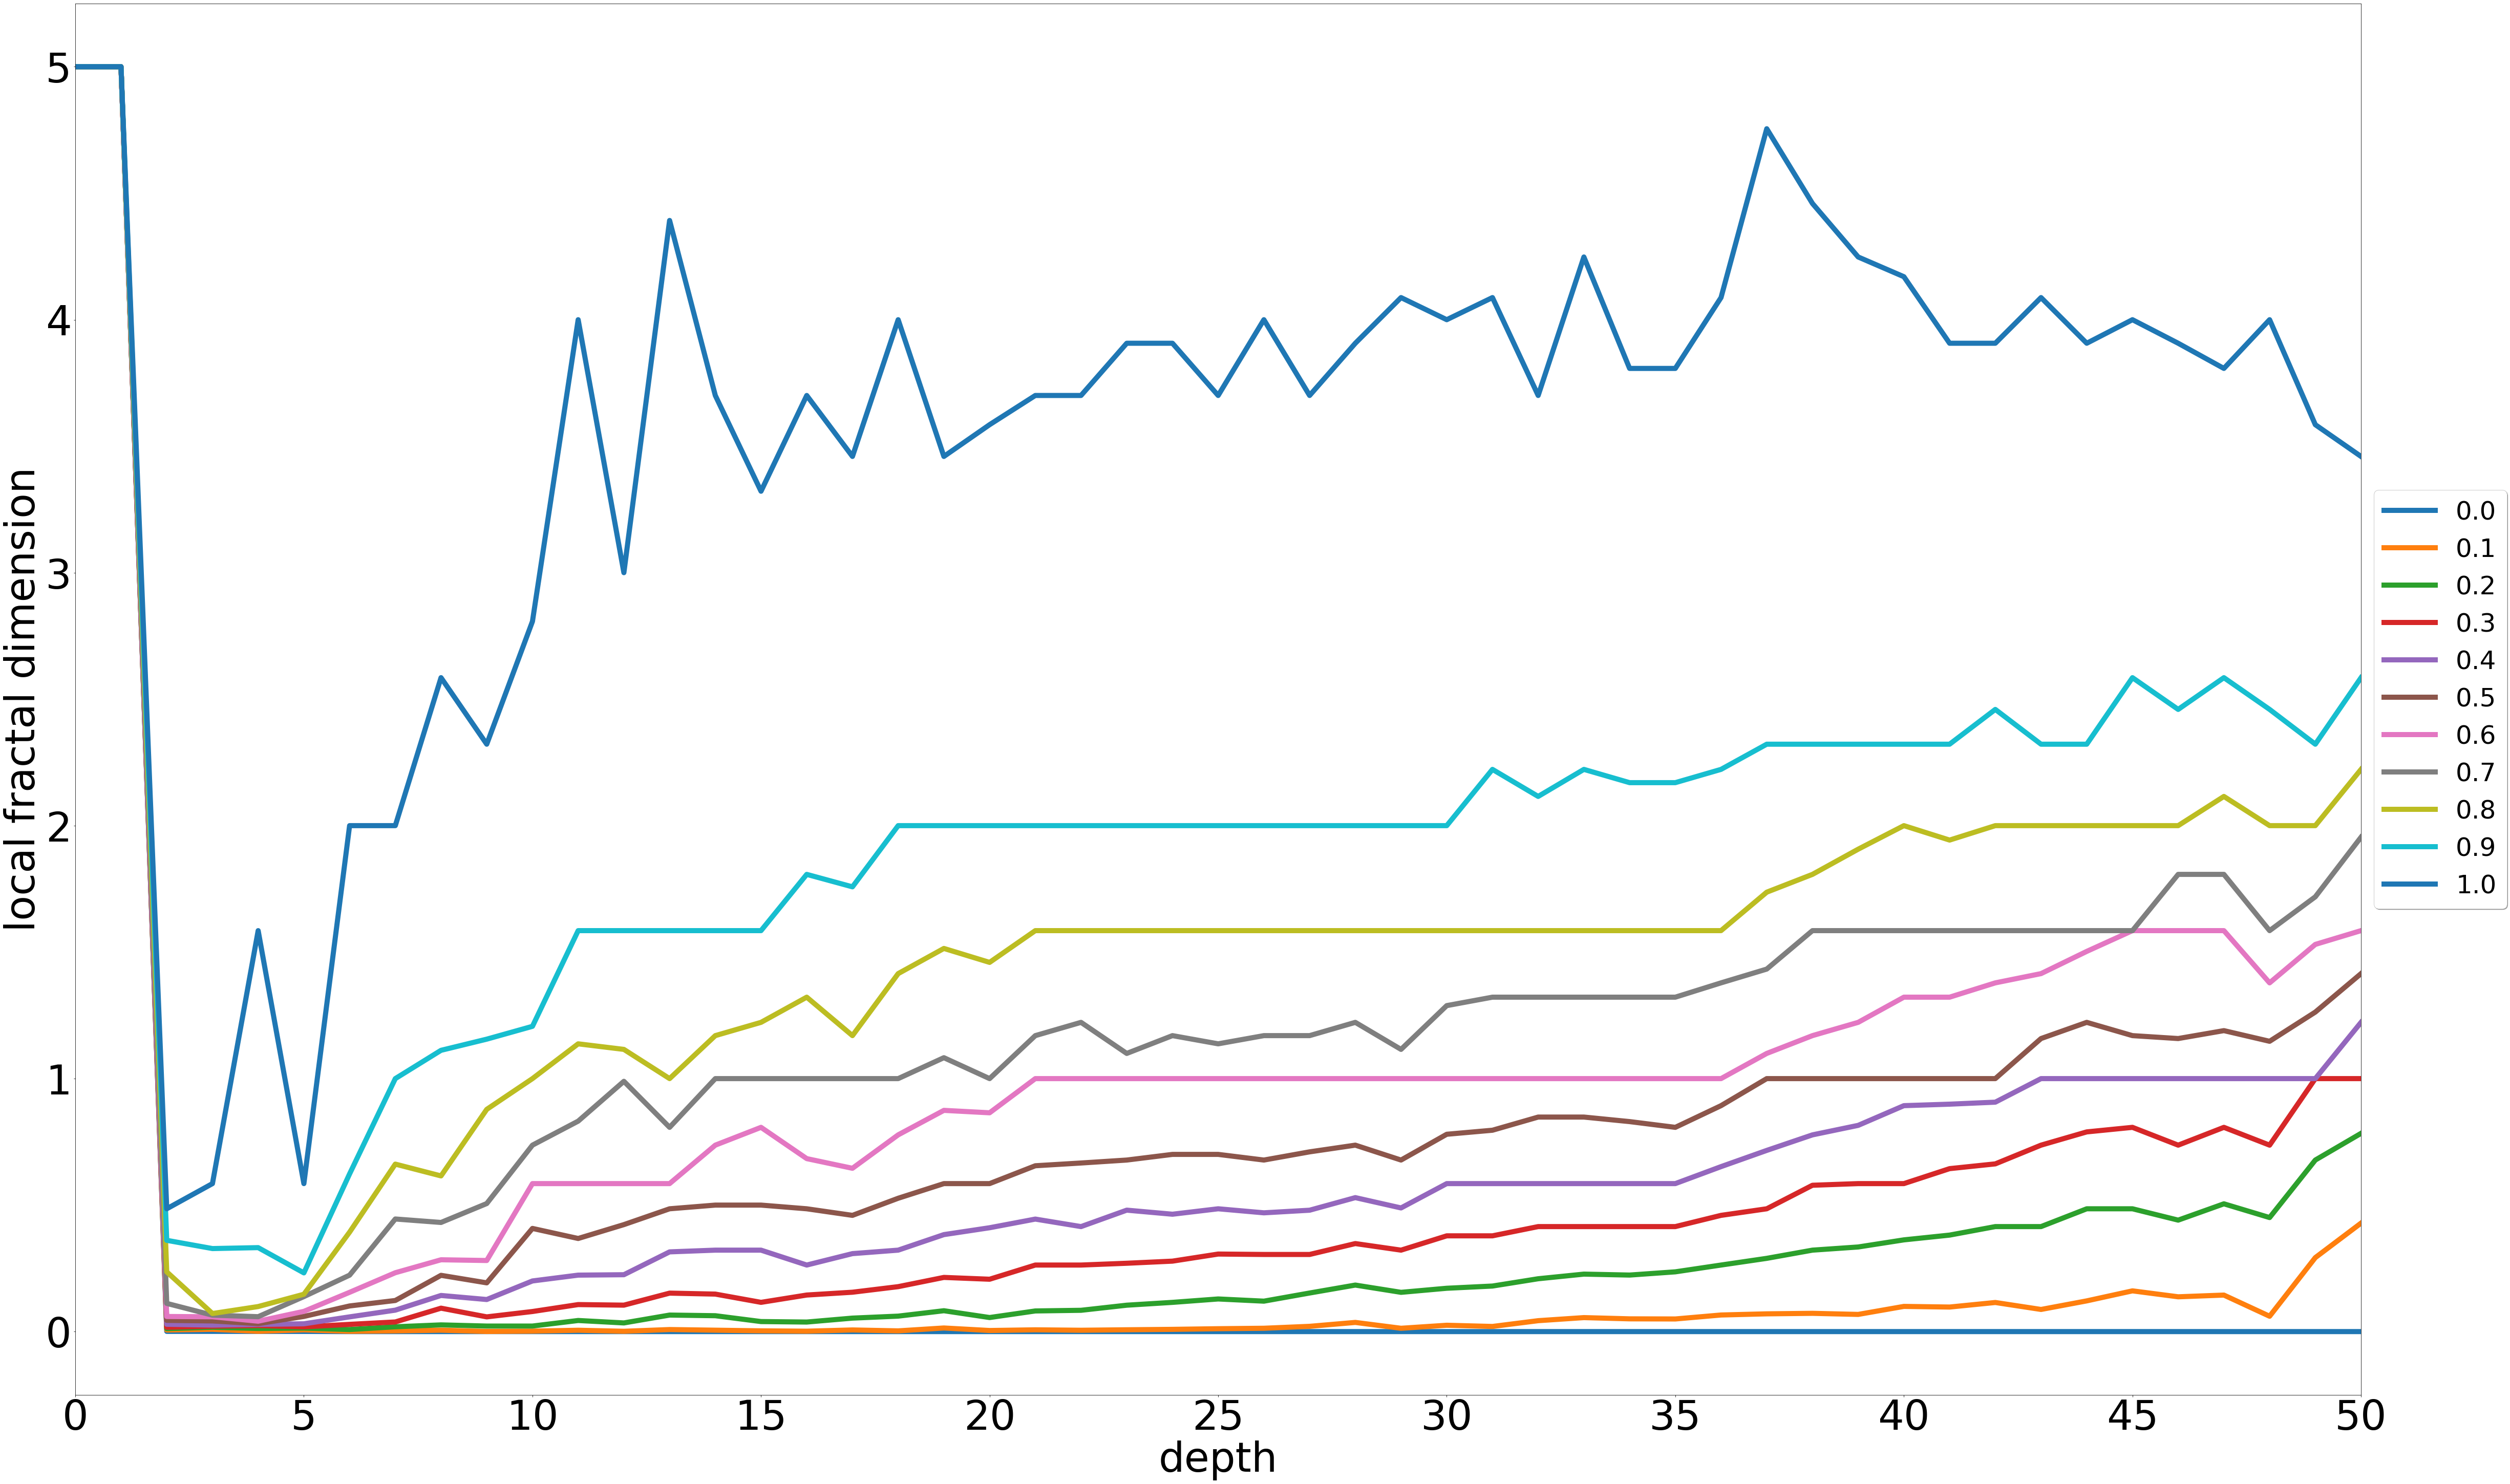

In [47]:
tags = list(map(str, labels))
quantiles_df = pd.DataFrame(quantiles)
quantiles_df['quantiles'] = labels
quantiles_df.set_index('quantiles', inplace=True)
quantiles_df_transpose = quantiles_df.T
fig, ax = plt.subplots()
my_plt = quantiles_df_transpose.plot(figsize=(100, 50), ax=ax, linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':50},
          fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
plt.xticks(list(range(0, max_depth + 1, 5)))
plt.xlabel('depth', fontsize=80)
plt.ylabel('local fractal dimension', fontsize=80)
plt.show()
my_plt.get_figure().savefig(f'plots/lfd_vs_depth_{dataset}_{metric}.png')

In [69]:
num_queries = 37

In [71]:
raw_data = pd.read_csv(
    f'logs/search_benchmarks_{dataset}_{metric}.csv',
    dtype={
        'depth': int,
        'radius': np.float64,
        'correctness': bool,
        'false_negative_rate': np.float64,
        'num_hits': int,
        'num_clusters_searched': int,
        'fraction_searched': np.float64,
        'df_calls_made': int,
        'linear_time': np.float64,
        'chess_time': np.float64,
        'speedup_factor': np.float64,
    }
)
raw_data = raw_data[:407]
raw_data.head()

,depth,radius,correctness,false_negative_rate,num_hits,num_clusters_searched,fraction_searched,df_calls_made,linear_time,chess_time,speedup_factor
0,0,0.0025,True,0.0,5,1,1.000000,123700,7.842668,7.755804,1.011
1,5,0.0025,True,0.0,5,19,0.999951,123694,7.842668,7.881991,0.995
2,10,0.0025,True,0.0,5,70,0.990736,122554,7.842668,7.713481,1.017
3,15,0.0025,True,0.0,5,209,0.968731,119832,7.842668,8.068341,0.972
4,20,0.0025,True,0.0,5,401,0.890647,110173,7.842668,7.822400,1.003


In [72]:
raw_data.describe()

,depth,radius,false_negative_rate,num_hits,num_clusters_searched,fraction_searched,df_calls_made,linear_time,chess_time,speedup_factor
count,407.000000,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,25.000000,2.500000e-03,0.002078,1521.513514,843.616708,0.593686,73439.017199,7.858162,6.688135,1.607049
std,15.830848,4.342146e-19,0.019789,2446.110631,1107.083995,0.391579,48438.355803,0.069754,2.323810,1.539526
min,0.000000,2.500000e-03,0.000000,0.000000,1.000000,0.003800,470.000000,7.705935,0.688052,0.731000
25%,10.000000,2.500000e-03,0.000000,0.000000,71.000000,0.199297,24653.000000,7.824445,5.887599,0.981000
50%,25.000000,2.500000e-03,0.000000,15.000000,393.000000,0.744923,92147.000000,7.858814,7.815334,1.008000
75%,40.000000,2.500000e-03,0.000000,2326.000000,1092.500000,0.989123,122354.500000,7.890540,8.008256,1.340000
max,50.000000,2.500000e-03,0.200000,9516.000000,4798.000000,1.000000,123700.000000,8.029163,10.744900,11.453000


In [73]:
total_linear_time = raw_data.linear_time.sum() / (raw_data.shape[0] / num_queries)
total_chess_time = raw_data.chess_time.sum()
total_time = total_chess_time + total_linear_time
print(f'total time: {total_time:.4f}')

total time: 3012.8228


In [74]:
# radii = [76, 153, 384]
# radii = [2000.0, 4000.0]
# radii = [0.0005, 0.001]
radii = [0.0025]

In [75]:
data_by_search_radius = {}
for r in radii:
    temp_df = raw_data[raw_data.radius == r]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_radius[r] = temp_df
data_by_search_radius.keys()

dict_keys([0.0025])

In [76]:
depths = list(range(0, max_depth + 1, 5))
depths

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [77]:
data_by_search_depth = {}
for d in depths:
    temp_df = raw_data[raw_data.depth == d]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_depth[d] = temp_df
data_by_search_depth.keys()

dict_keys([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [78]:
x = depths
y1 = []  # comparisons
y2 = []  # speedup
y3 = []  # time
y4 = []  # fraction
ys = []

In [79]:
print(f'depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, fraction_std, speedup_mu')
for r in radii:
    mos = data_by_search_radius[r].num_hits.mean()
    sos = data_by_search_radius[r].num_hits.std()
    print(f'\nradius: {r}, mean_output_size: {mos:.0f}, std_output_size: {sos:.0f}')
    for depth, df_by_depth in data_by_search_depth.items():
        data_df = df_by_depth[df_by_depth.radius == r]
        
        mean_df_calls = data_df.df_calls_made.mean() / 10_000
        stddev_df_calls = data_df.df_calls_made.std() / 10_000
        y1.append(mean_df_calls)
        
        mean_speedup = data_df.speedup_factor.mean()
        y2.append(mean_speedup)
        
        mean_time = data_df.chess_time.mean()
        stddev_time = data_df.chess_time.std()
        y3.append(mean_time)
        
        mean_fraction = data_df.fraction_searched.mean()
        stddev_fraction = data_df.fraction_searched.std()
        y4.append(mean_fraction)
        
        if not depth in depths:
            continue
        print(f'{depth} & {mean_df_calls:.2f} & {stddev_df_calls:.2f} & {mean_time:.2f} & '
              f'{stddev_time:.2f} & {mean_fraction:.2f} & {stddev_fraction:.2f} & '
              f'{mean_speedup:.2f}\\\\')
    ys.append((y1.copy(), y2.copy(), y3.copy(), y4.copy()))
    y1, y2, y3, y4 = [], [], [], []

depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, fraction_std, speedup_mu

radius: 0.0025, mean_output_size: 1522, std_output_size: 2446
0 & 12.37 & 0.00 & 7.84 & 0.09 & 1.00 & 0.00 & 1.00\\
5 & 12.37 & 0.00 & 7.90 & 0.07 & 1.00 & 0.00 & 0.99\\
10 & 12.24 & 0.02 & 7.91 & 0.08 & 0.99 & 0.00 & 0.99\\
15 & 11.92 & 0.13 & 8.00 & 0.11 & 0.96 & 0.01 & 0.98\\
20 & 10.88 & 1.25 & 7.81 & 0.90 & 0.88 & 0.10 & 1.04\\
25 & 8.55 & 2.07 & 7.16 & 1.65 & 0.69 & 0.17 & 1.27\\
30 & 4.93 & 2.44 & 5.84 & 2.40 & 0.40 & 0.20 & 1.90\\
35 & 2.65 & 2.02 & 5.27 & 2.78 & 0.21 & 0.16 & 2.32\\
40 & 1.76 & 1.56 & 5.25 & 2.96 & 0.14 & 0.13 & 2.39\\
45 & 1.57 & 1.46 & 5.30 & 3.04 & 0.13 & 0.12 & 2.39\\
50 & 1.54 & 1.45 & 5.28 & 3.03 & 0.12 & 0.12 & 2.39\\


In [80]:
np.shape(ys[0][0])

(11,)

<Figure size 432x288 with 0 Axes>

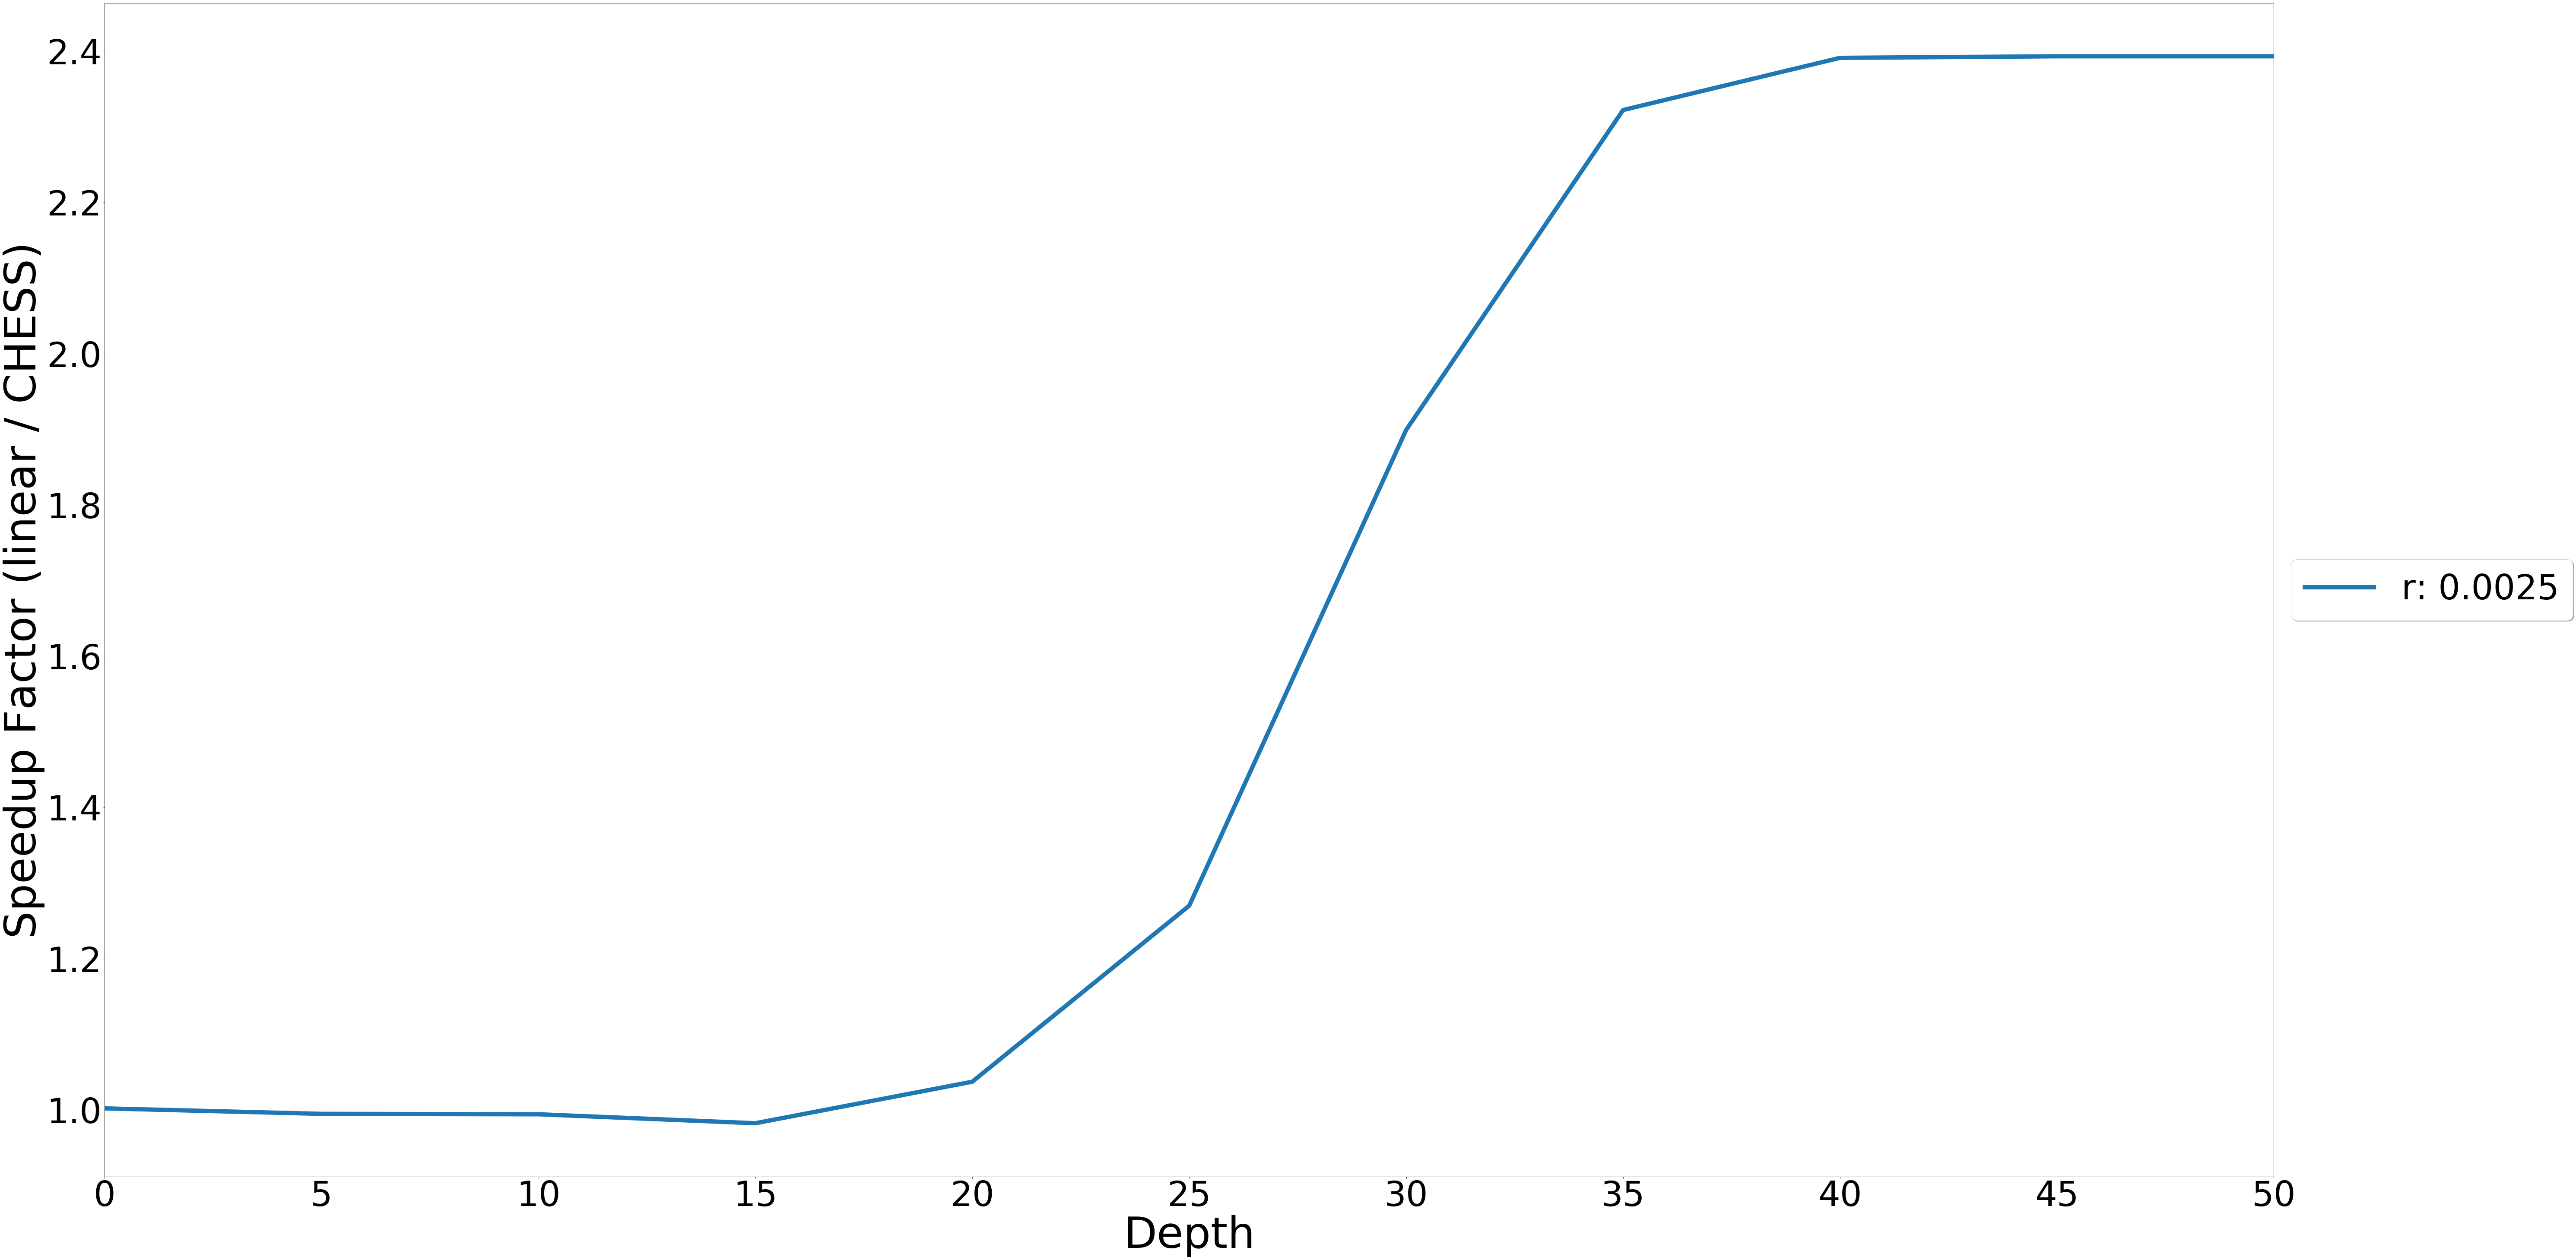

In [83]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][1], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
# ax.set_ylim([0, 3])
# plt.yticks([i for i in range(4)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Speedup Factor (linear / CHESS)', fontsize=100)
plt.show()
fig.savefig(f'plots/speedup_factor_{dataset}_{metric}.png')

<Figure size 432x288 with 0 Axes>

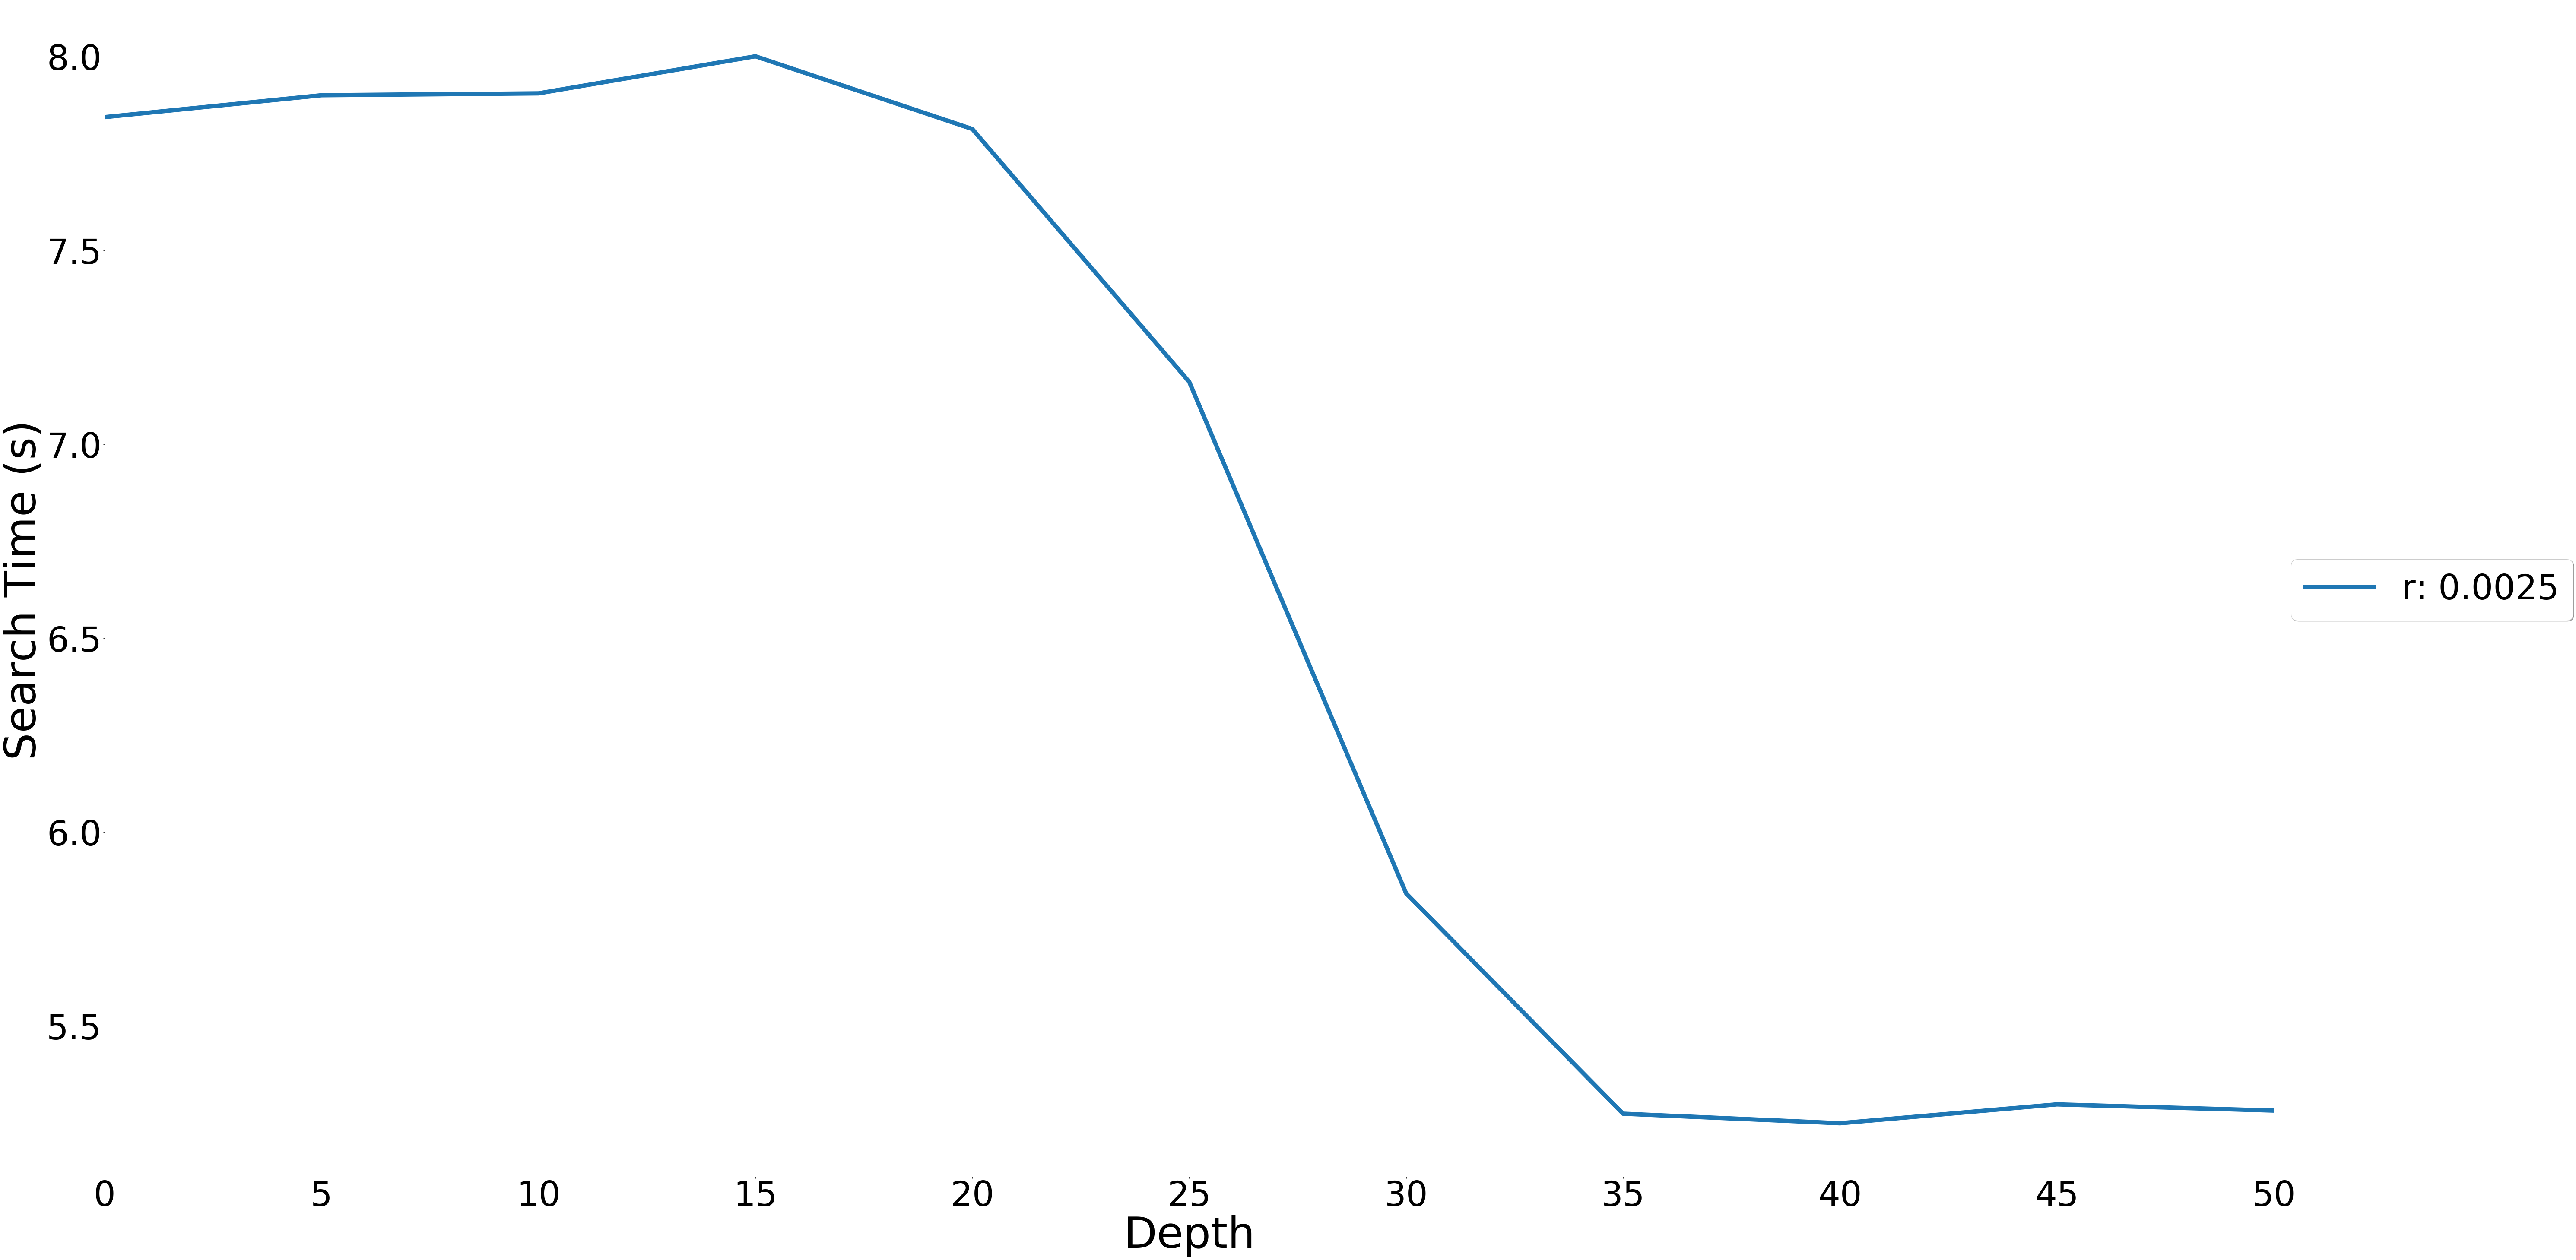

In [84]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][2], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
# ax.set_ylim([0, 10])
# plt.yticks([i for i in range(0, 11, 2)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Search Time (s)', fontsize=100)
plt.show()
fig.savefig(f'plots/search_time_{dataset}_{metric}.png')